<a href="https://colab.research.google.com/github/AbiaAlvesReis/Projeto-IA-2022-01/blob/main/AMMS_ExemploPraticoRegrLinear_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Carregar o dataset

In [5]:
from google.colab import drive

drive.mount('/content/drive')

#uploaded = files.upload()

Mounted at /content/drive


In [18]:
import io
import numpy as np
import pandas as pd

#df = pd.read_csv(io.BytesIO(uploaded['data_set_iqvu-bh.csv']), sep=";", decimal=",")
df = pd.read_excel('/content/drive/MyDrive/2022/IA - projeto/dados brutos mega sena/megas-soma-dezenas.xlsx', parse_dates=True, index_col=0)

df.head()

,ball_01,ball_02,ball_03,ball_04,ball_05,ball_06,sum
apagar,,,,,,,
NaT,59.0,36.0,41.0,54.0,14.0,11.0,215
NaT,54.0,49.0,34.0,38.0,40.0,20.0,235
NaT,32.0,1.0,57.0,44.0,35.0,45.0,214
NaT,1.0,37.0,36.0,21.0,8.0,27.0,130
NaT,31.0,56.0,6.0,4.0,50.0,9.0,156


#Descrição dos dados

In [20]:
#df.drop('apagar', inplace=True, axis=0)
df.describe(include='all')

,ball_01,ball_02,ball_03,ball_04,ball_05,ball_06,sum
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,30.453301,30.159018,30.731481,30.746377,30.565217,30.371578,183.026973
std,17.295606,17.366813,17.331223,17.249376,17.170328,17.177335,40.059818
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.000000
25%,16.000000,15.000000,16.000000,16.000000,15.000000,16.000000,155.000000
50%,30.000000,31.000000,31.000000,31.000000,31.000000,30.000000,183.000000
75%,45.000000,45.000000,45.250000,45.000000,45.000000,45.000000,211.000000
max,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,331.000000


#Exemplo de gráfico Boxplot

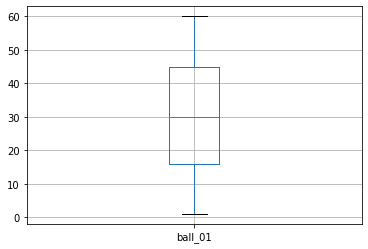

In [21]:
df.boxplot(column="ball_01")

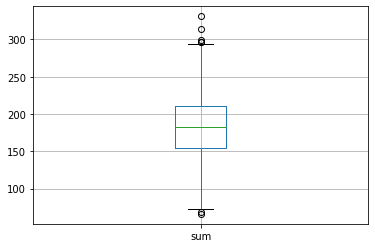

In [22]:
df.boxplot(column="sum")

Exemplo de gráfico Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05a9b2bad0>]],
      dtype=object)

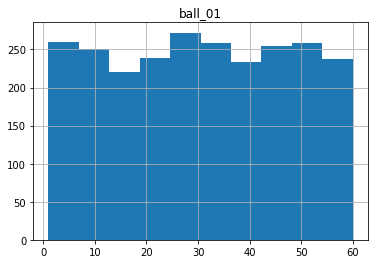

In [23]:
df.hist(column="ball_01")

#Início da Regressão

#Importar biblioteca para separar dados:
 * treinamento
 * teste

In [24]:
from sklearn.model_selection import train_test_split

Importar biblioteca de Regressão Linear

In [25]:
from sklearn.linear_model import LinearRegression

#Particionamento dos dados: excluindo as três colunas iniciais

In [26]:
new_df = df.iloc[:,0:]

new_df.head()

,ball_01,ball_02,ball_03,ball_04,ball_05,ball_06,sum
apagar,,,,,,,
NaT,59.0,36.0,41.0,54.0,14.0,11.0,215
NaT,54.0,49.0,34.0,38.0,40.0,20.0,235
NaT,32.0,1.0,57.0,44.0,35.0,45.0,214
NaT,1.0,37.0,36.0,21.0,8.0,27.0,130
NaT,31.0,56.0,6.0,4.0,50.0,9.0,156


#Criando X e y para o modelo de regressão

In [27]:
y = new_df['sum']

y[0:5]

apagar
NaT    215
NaT    235
NaT    214
NaT    130
NaT    156
Name: sum, dtype: int64

In [28]:
X = new_df.drop(['sum'], axis=1)

X.head()

,ball_01,ball_02,ball_03,ball_04,ball_05,ball_06
apagar,,,,,,
NaT,59.0,36.0,41.0,54.0,14.0,11.0
NaT,54.0,49.0,34.0,38.0,40.0,20.0
NaT,32.0,1.0,57.0,44.0,35.0,45.0
NaT,1.0,37.0,36.0,21.0,8.0,27.0
NaT,31.0,56.0,6.0,4.0,50.0,9.0


#Separação dos dados para Teste e Treinamento

In [29]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.7, random_state=100)

#Treinar o modelo de Regressão Linear

In [30]:
reg = LinearRegression().fit(X_treino, y_treino)

#Acurácia do modelo de treinamento

In [31]:
print('Treino:', reg.score(X_treino, y_treino))

Treino: 1.0


#Acurácia do modelo para teste

In [32]:
print('Teste:', reg.score(X_teste, y_teste))

Teste: 1.0


#Impressão do modelo matemático de regressão: y = AX + b

coeficientes A

In [33]:
reg.coef_

array([1., 1., 1., 1., 1., 1.])

coeficiente b

In [34]:
reg.intercept_

-2.842170943040401e-14

calculando AX + b

In [35]:
(0.631*0.082 + 0.347*0.0214 + 0.803*0.133 + 0.394*0.185 + 0.792*0.160 + 0.942*0.069 + 0.311*0.140 + 0.211*0.119 + 0.740*0.080) + 0.0056

0.5640238000000001

#Análise de dados: analisando a influência das variáveis independentes

In [38]:
import pandas.util.testing as tm
from statsmodels.api import OLS

In [39]:
summary = OLS(y_treino, X_treino).fit()
print(summary.summary())

                                 OLS Regression Results                                
Dep. Variable:                    sum   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.220e+33
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:11:00   Log-Likelihood:                          50796.
No. Observations:                1738   AIC:                                 -1.016e+05
Df Residuals:                    1732   BIC:                                 -1.015e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

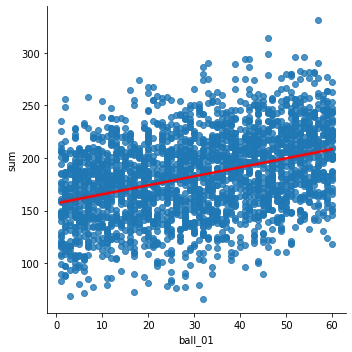

In [40]:
import seaborn as sns
sns.lmplot(x='ball_01', y='sum', data=new_df, fit_reg=True, line_kws={'color': 'red'})

A natur